<a href="https://colab.research.google.com/github/Abhy611/Implementation-of-CNN/blob/main/PRN_31_MNIST_Digit_recognition_Implementation_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIM:- To implement a convolutional neural network (CNN) for MNIST digit recognition using TensorFlow

**First, we need to import the necessary libraries and modules:**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Loading the MNIST dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Normalize the input image so that each pixel value is between 0 to 1.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshaping the dataset into 4D arrays

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the model architecture

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (five iterations of training)

In [ ]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1402 - accuracy: 0.9569 - val_loss: 0.0560 - val_accuracy: 0.9826
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0378 - val_accuracy: 0.9893
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0366 - val_accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0271 - val_accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0204 - accuracy: 0.9932 - val_loss: 0.0245 - val_accuracy: 0.9926


# Evaluate the model on test set

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0245 - accuracy: 0.9926
Test accuracy: 0.9926000237464905


# Plotting the accuracy curves

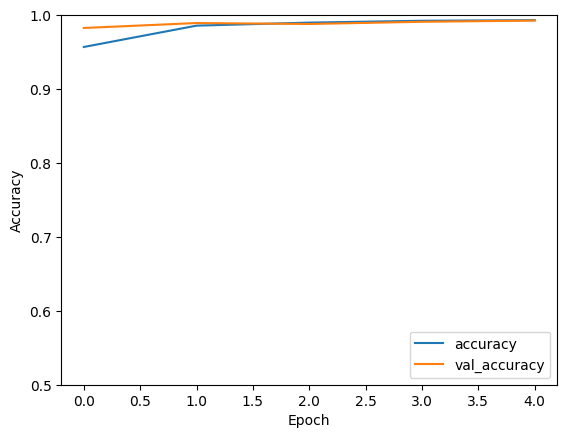

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Here, a straightforward CNN model with two convolution/maxpooling layers and one dense layer is implemented. The model has undergone five iterations of training and has 99% test accuracy on MNIST. The graphic displays the training-related accuracy curves.